# Computational Error Example

Last lecture, we considered the following approximation of $f'(x)$:
$$
f'(x) \approx \frac{f(x+h) - f(x)}{h}.
$$
We finished by deriving the following expression for an upper bound $g(h)$ on the *computational error* in this approximation:
$$
g(h) = \frac{1}{2}M h + 2 \frac{\epsilon_{\mathrm{mach}}}{h},
$$
where $M \triangleq \underset{x \in [x, x+h]}{\max} |f''(x)|$. Recall that this total computational error's two terms stem from *truncation* error and *rounding* error respectively.

**Question**: when is this error smallest? Let's check the first order optimality condition: 
$$
g'(h) = \frac{1}{2}M - \frac{2\epsilon_{\mathrm{mach}}}{h^2} = 0.
$$
This is solved by
$$
h^2 = \frac{4\epsilon_{\mathrm{mach}}}{M} \implies h = 2\sqrt{\frac{\epsilon_{\mathrm{mach}}}{M}}.
$$

Let's plot this for $\sin(x)$!

In [2]:
x = π/4
h = 10 .^(-16:0.1:0.1)
M = 1.0
# Inline function definitions! 
f(x) = sin.(x)
fp_accurate = cos.(x)
fp = (f(x .+ h) .- f(x))./h;

In [3]:
error = abs.(fp_accurate .- fp)
truncation(h) = M.*h./2
roundoff(h) = 2*eps()./h
err_bound(h) = truncation(h) + roundoff(h)
error_bound = err_bound(h);

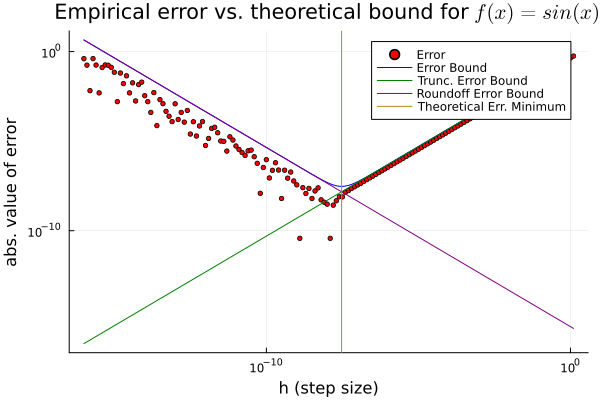

In [4]:
using Plots 

scatter(h, error, color=:red, label="Error", xaxis=:log, yaxis=:log, markersize=2.5)
plot!(h, error_bound, color=:blue, label="Error Bound", xaxis=:log, yaxis=:log)
plot!(h, truncation(h), color=:green, label="Trunc. Error Bound", xaxis=:log, yaxis=:log)
plot!(h, roundoff(h), color=:purple, label="Roundoff Error Bound", xaxis=:log, yaxis=:log)
xaxis!("h (step size)")
yaxis!("abs. value of error")
title!("Empirical error vs. theoretical bound for \$f(x)=sin(x)\$")
vline!([2*sqrt(eps()/M)], label="Theoretical Err. Minimum")

## Takeaways 
1. Taylor's theorem is a powerful tool for predicting error
2. There is a *tradeoff* between roundoff and truncation error
3. This is a general result - only parts specific to $\sin$ were the derivative ($\cos$) and its maximum ($M$), and the particular power series of $\sin$.
4. Note the $\log$ axes of the plot!

## Questions
Consider the form of the error once more:

$$
g(h) = \frac{1}{2}M h + 2 \frac{\epsilon_{\mathrm{mach}}}{h},
$$

1. Where does the *roundoff* error dominate? Likewise, what "regime" does the *truncation* error dominate in?
2. What are the qualitative differences between the actual error values (scatter plot) in each regime?
3. What is the significance of $M$? How does *continuity* come into play?
4. What applications might involving selecting $h$ in this way?

# Truncation Error

Recall Taylor's theorem:

For $f \in C^{n+1}[x, x+h]$, 
$$
f(x+h) = \sum_{k=1}^n \frac{f^{k}(x)}{k!}h^k + E_{n+1},
$$

where $E_{n+1}$ is bounded by $O(h^{n+1})$.

Let's plot out multiple approximations of $e^x$. 

In [1]:
x = 0.0
h = 0.0:0.01:1.0
f1(x) = 1 .+ x
f2(x) = f1(x) .+ x.^2/2
f3(x) = f2(x) .+ x.^3/3
f_acc = exp.(x .+ h);

In [2]:
e2 = abs.(f1(h) .- f_acc)
e3 = abs.(f2(h) .- f_acc)
e4 = abs.(f3(h) .- f_acc);

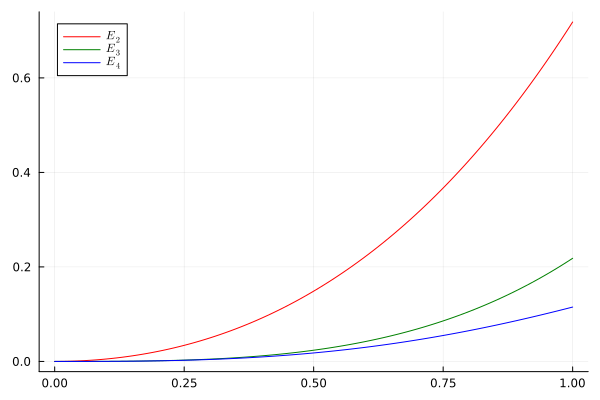

In [3]:
using Plots

plot(h, e2, label="\$E_2\$", color=:red)
plot!(h, e3, label="\$E_3\$", color=:green)
plot!(h, e4, label="\$E_4\$", color=:blue)



# Divergent Sequence

Consider the sequence $a_i = i*a_{i-1} - 1$ for $a_0 = e - 1$. Find $a_{25}$.

In [7]:
N = 25
a0 = exp(1) - 1
a = zeros(N)
a[1] = a0 - 1
for i in 2:N
    a[i] = i*a[i-1] - 1
end
a[N]

-2.242373258570158e9

Now try to find it using more precise FP arithmetic via `BigFloat`:

In [8]:
a0_acc = exp(BigFloat(1)) - 1
a_acc = zeros(BigFloat, N)
a_acc[1] = a0_acc - 1
for i in 2:N
    a_acc[i] = i*a_acc[i-1] - 1
end
a_acc[N]

0.03993872967323020890367145521036106098109024620940005290706194932023399028871784

Let's plot the error:

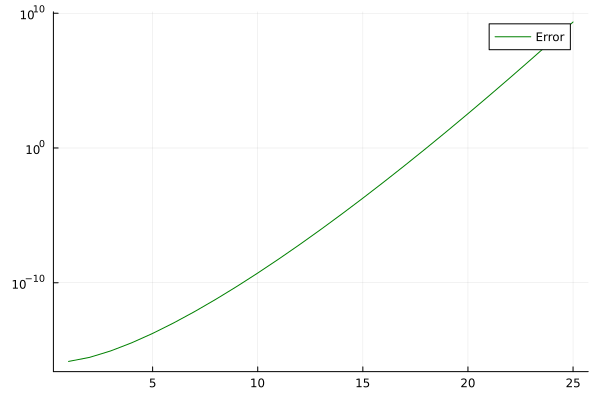

In [9]:
using Plots
# plot(a[1:18], label="Double")
# plot!(a_acc[1:18], color=:red, label="BigFloat")
plot(abs.(a_acc - a), color=:green, label="Error", yaxis=:log)

It looks like the initial error in the standard double (`Float64`) computation blows up! It's also interesting that we get a negative result... let's try the same computation but initialize $a_0$ with the next largest floating point number:

In [10]:
a0 = nextfloat(exp(1)) - 1
a = zeros(N)
a[1] = a0 - 1
for i in 2:N
    a[i] = i*a[i-1] - 1
end
a[N]

4.645987753391055e9

Interesting! It blows up, but this time in the positive direction.

## Questions

1. What type of error caused this problem? 
2. What applications might this example be related to?